In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# download the file and connect

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Access and read the file
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [11]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [12]:
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [13]:
sample_submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [14]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Display basic information about the dataset
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
# Summary statistics for LotArea
lot_area_stats = train['LotArea'].describe()
print(lot_area_stats)

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


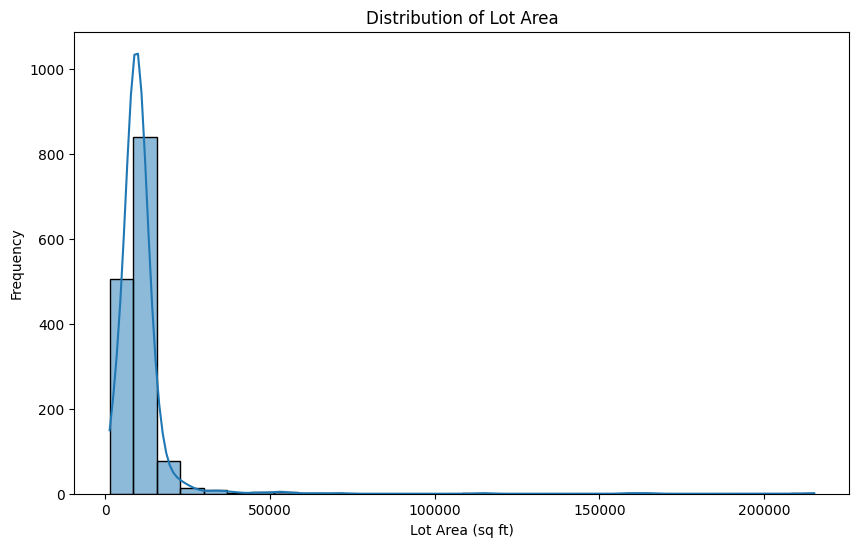

In [17]:
# Distribution plot for LotArea
plt.figure(figsize=(10, 6))
sns.histplot(train['LotArea'], kde=True, bins=30)
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Frequency')
plt.show()

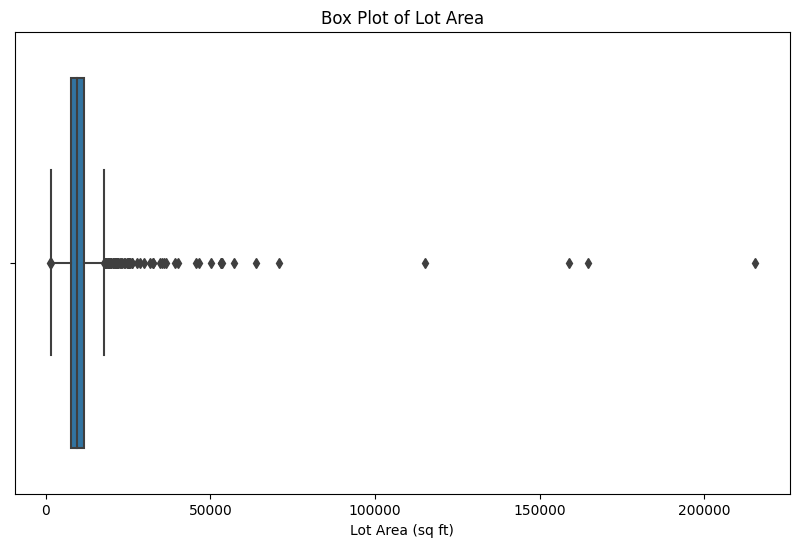

In [18]:
# Boxplot for LotArea to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['LotArea'])
plt.title('Box Plot of Lot Area')
plt.xlabel('Lot Area (sq ft)')
plt.show()

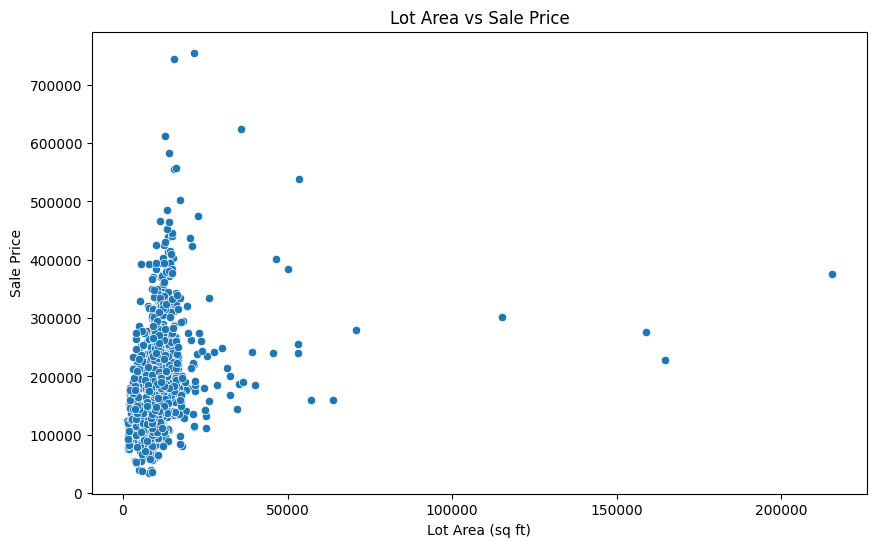

The correlation coefficient between Lot Area and Sale Price is: 0.26


In [19]:
# Scatter plot for LotArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['LotArea'], y=train['SalePrice'])
plt.title('Lot Area vs Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# Calculating the correlation coefficient
correlation = train['LotArea'].corr(train['SalePrice'])
print(f'The correlation coefficient between Lot Area and Sale Price is: {correlation:.2f}')


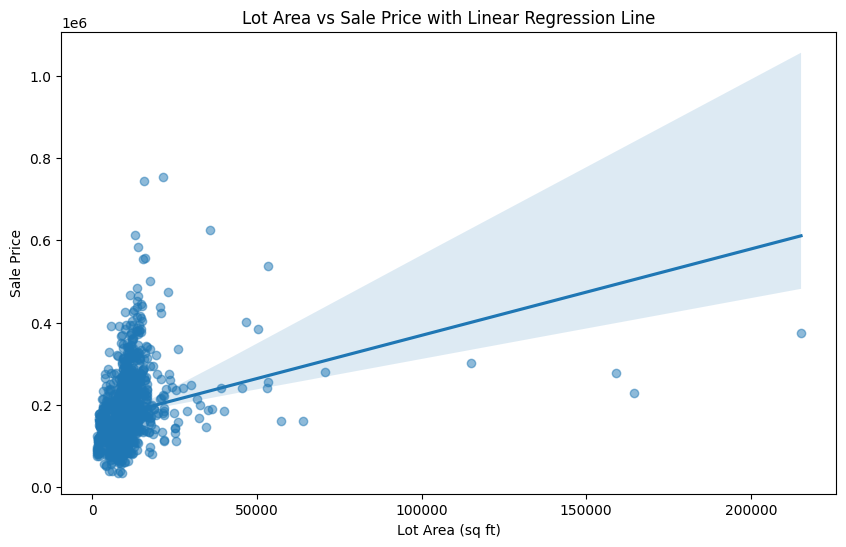

In [20]:
# Scatter plot with linear regression line for LotArea vs SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x='LotArea', y='SalePrice', data=train, scatter_kws={'alpha':0.5})
plt.title('Lot Area vs Sale Price with Linear Regression Line')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

In [21]:
# Summary statistics for LotFrontage
lot_frontage_stats = train['LotFrontage'].describe()
print(lot_area_stats)

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


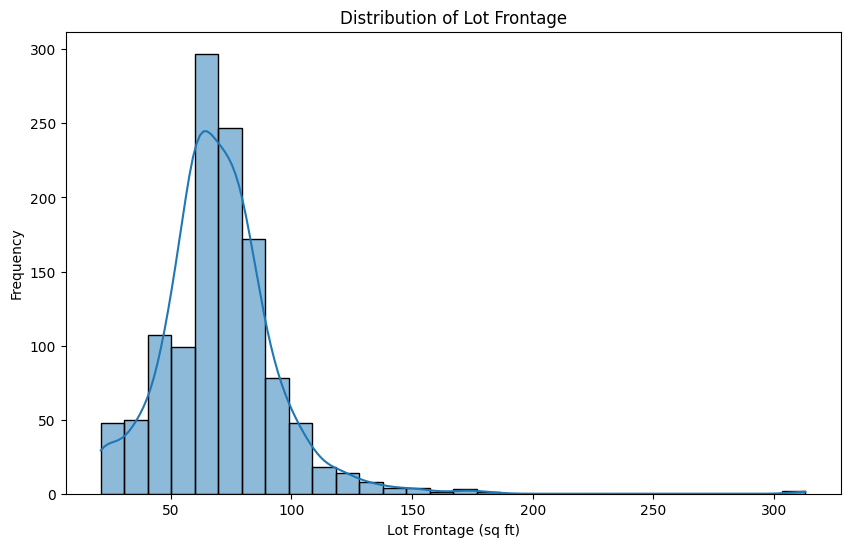

In [22]:
# Distribution plot for LotFrontage
plt.figure(figsize=(10, 6))
sns.histplot(train['LotFrontage'], kde=True, bins=30)
plt.title('Distribution of Lot Frontage')
plt.xlabel('Lot Frontage (sq ft)')
plt.ylabel('Frequency')
plt.show()

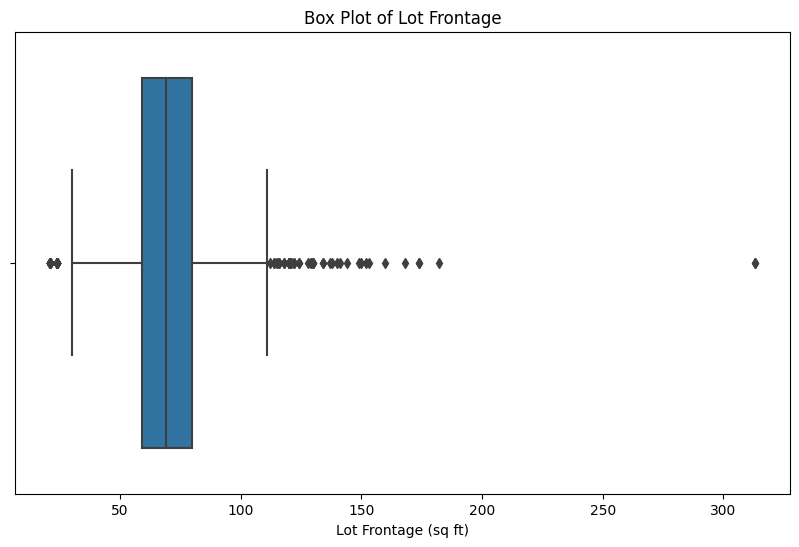

In [23]:
# Boxplot for LotFrontage to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['LotFrontage'])
plt.title('Box Plot of Lot Frontage')
plt.xlabel('Lot Frontage (sq ft)')
plt.show()

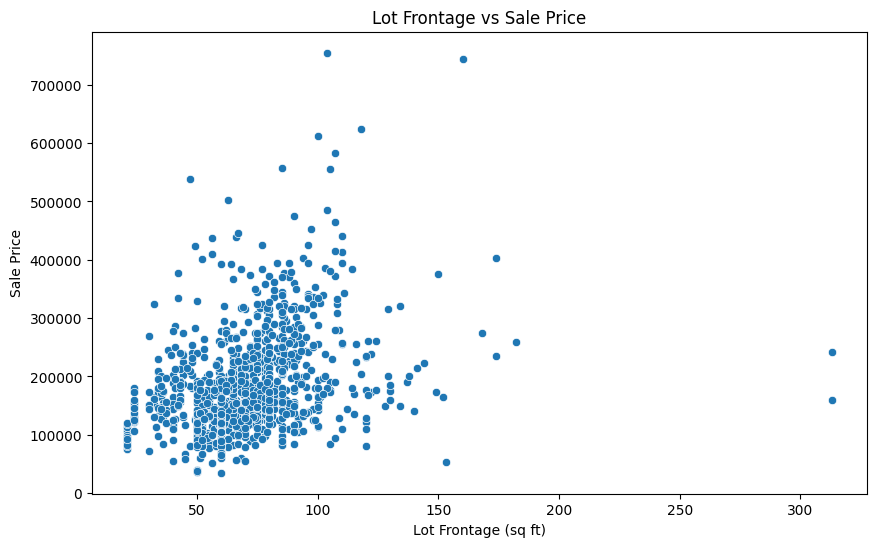

The correlation coefficient between Lot Frontage and Sale Price is: 0.35


In [24]:
# Scatter plot for LotFrontage vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['LotFrontage'], y=train['SalePrice'])
plt.title('Lot Frontage vs Sale Price')
plt.xlabel('Lot Frontage (sq ft)')
plt.ylabel('Sale Price')
plt.show()

# Calculating the correlation coefficient
correlation = train['LotFrontage'].corr(train['SalePrice'])
print(f'The correlation coefficient between Lot Frontage and Sale Price is: {correlation:.2f}')


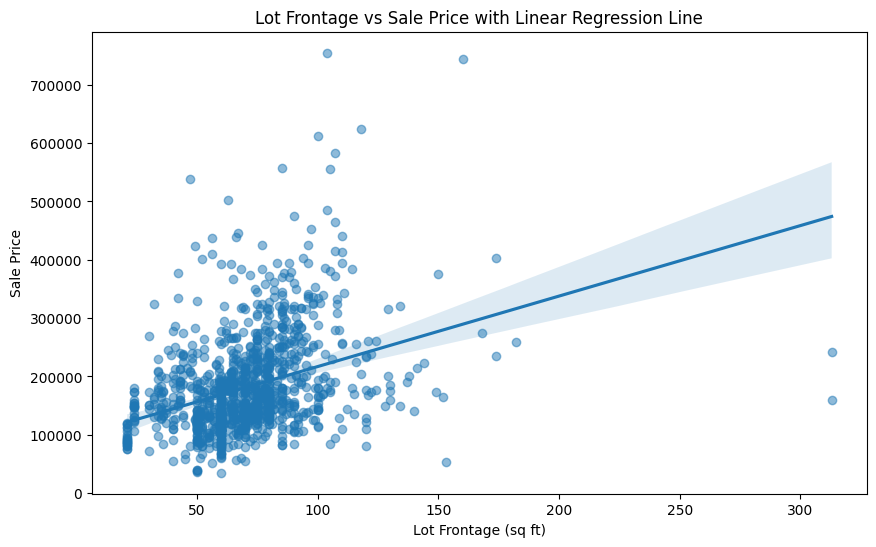

In [25]:
# Scatter plot with linear regression line for LotFrontage vs SalePrice
plt.figure(figsize=(10, 6))
sns.regplot(x='LotFrontage', y='SalePrice', data=train, scatter_kws={'alpha':0.5})
plt.title('Lot Frontage vs Sale Price with Linear Regression Line')
plt.xlabel('Lot Frontage (sq ft)')
plt.ylabel('Sale Price')
plt.show()

In [26]:
# Summary statistics for LandContour
land_contour_counts = train['LandContour'].value_counts()
print(land_contour_counts)

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64


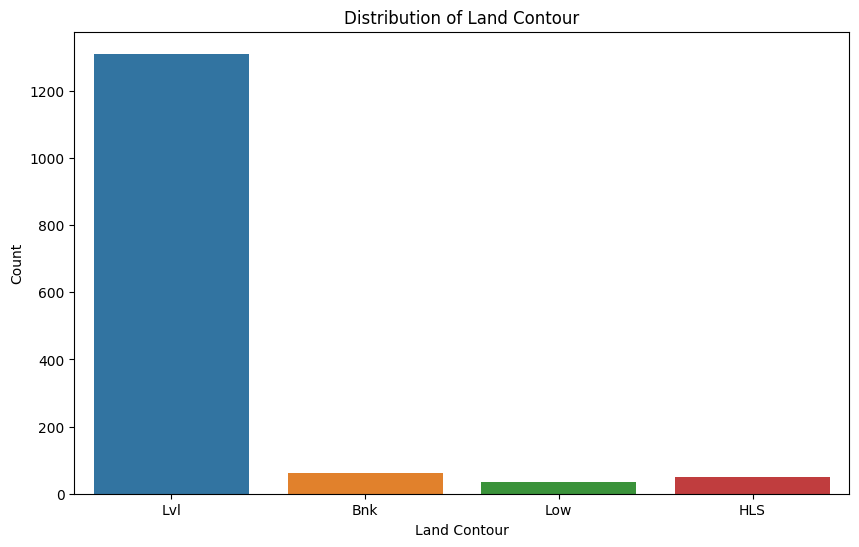

In [27]:
# Count plot for LandContour
plt.figure(figsize=(10, 6))
sns.countplot(x='LandContour', data=train)
plt.title('Distribution of Land Contour')
plt.xlabel('Land Contour')
plt.ylabel('Count')
plt.show()

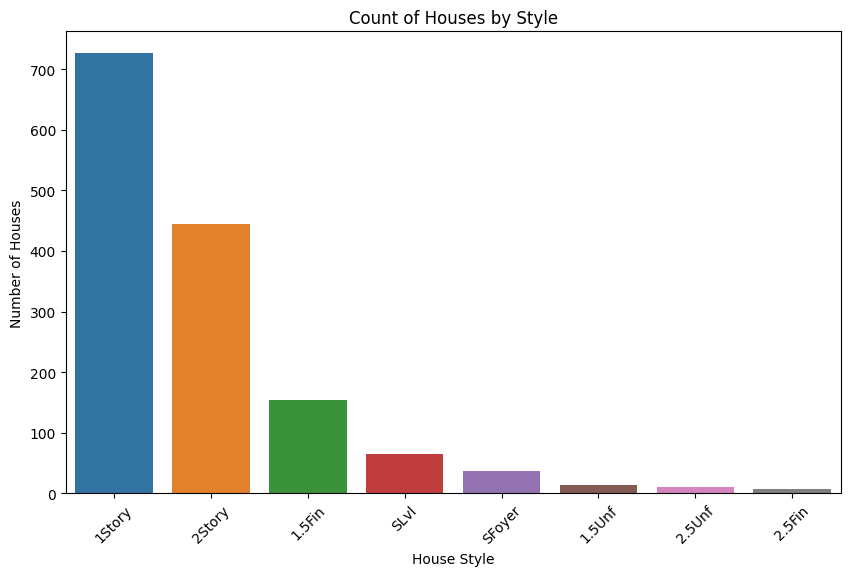

In [28]:
#Count Plot for HouseStyle
plt.figure(figsize=(10, 6))
sns.countplot(x='HouseStyle', data=train, order=train['HouseStyle'].value_counts().index)
plt.title('Count of Houses by Style')
plt.xlabel('House Style')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.ylabel('Number of Houses')
plt.show()

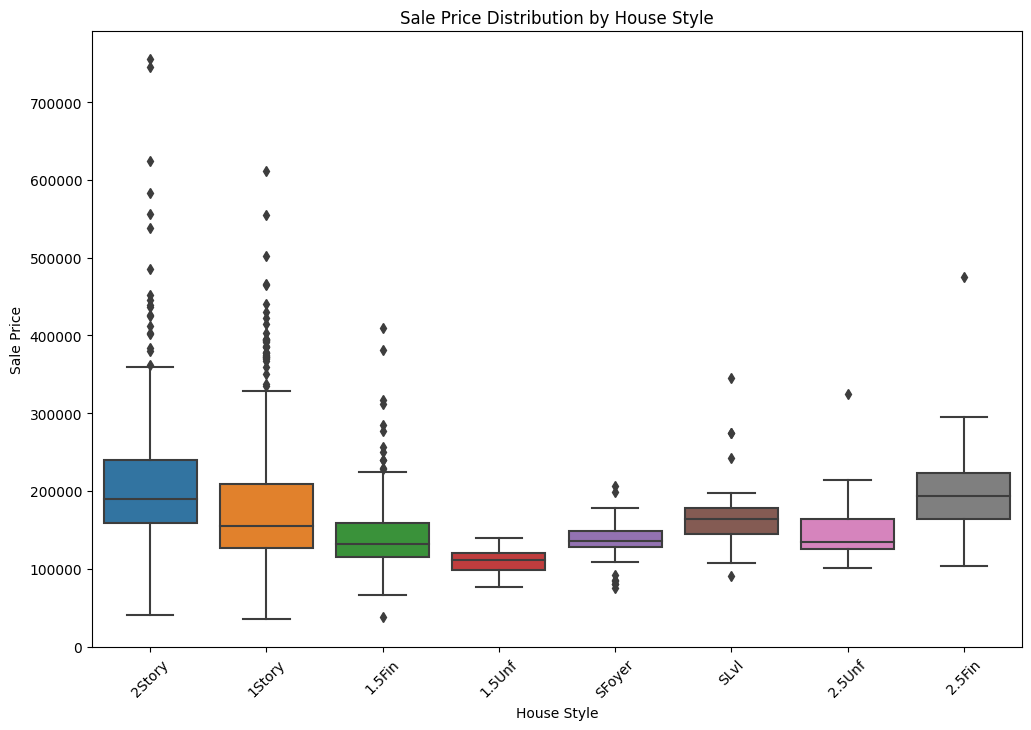

In [29]:
#Box Plot for SalePrice by HouseStyle
plt.figure(figsize=(12, 8))
sns.boxplot(x='HouseStyle', y='SalePrice', data=train)
plt.title('Sale Price Distribution by House Style')
plt.xlabel('House Style')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.ylabel('Sale Price')
plt.show()


HouseStyle
2.5Fin    220000.000000
2Story    210051.764045
1Story    175985.477961
SLvl      166703.384615
2.5Unf    157354.545455
1.5Fin    143116.740260
SFoyer    135074.486486
1.5Unf    110150.000000
Name: SalePrice, dtype: float64


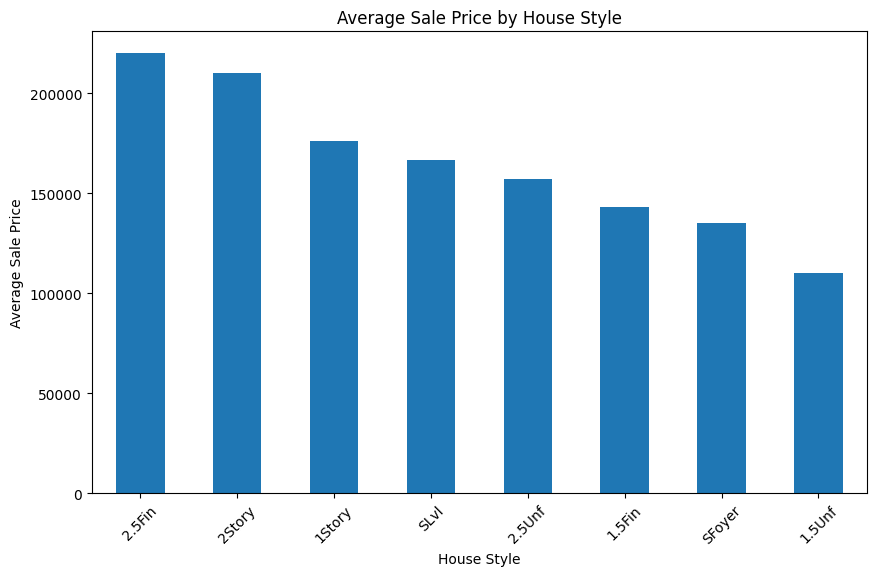

In [30]:
#Average SalePrice by HouseStyle
avg_saleprice_by_housestyle = train.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=False)
print(avg_saleprice_by_housestyle)

# Optionally, you can plot this data
avg_saleprice_by_housestyle.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sale Price by House Style')
plt.xlabel('House Style')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)  # Rotate labels to prevent overlap
plt.show()

In [31]:
# Selecting only numerical variables
numerical_train = train.select_dtypes(include=['int64', 'float64'])

In [32]:
# Calculate the correlation matrix for numerical variables
corr_matrix_numerical = numerical_train.corr()

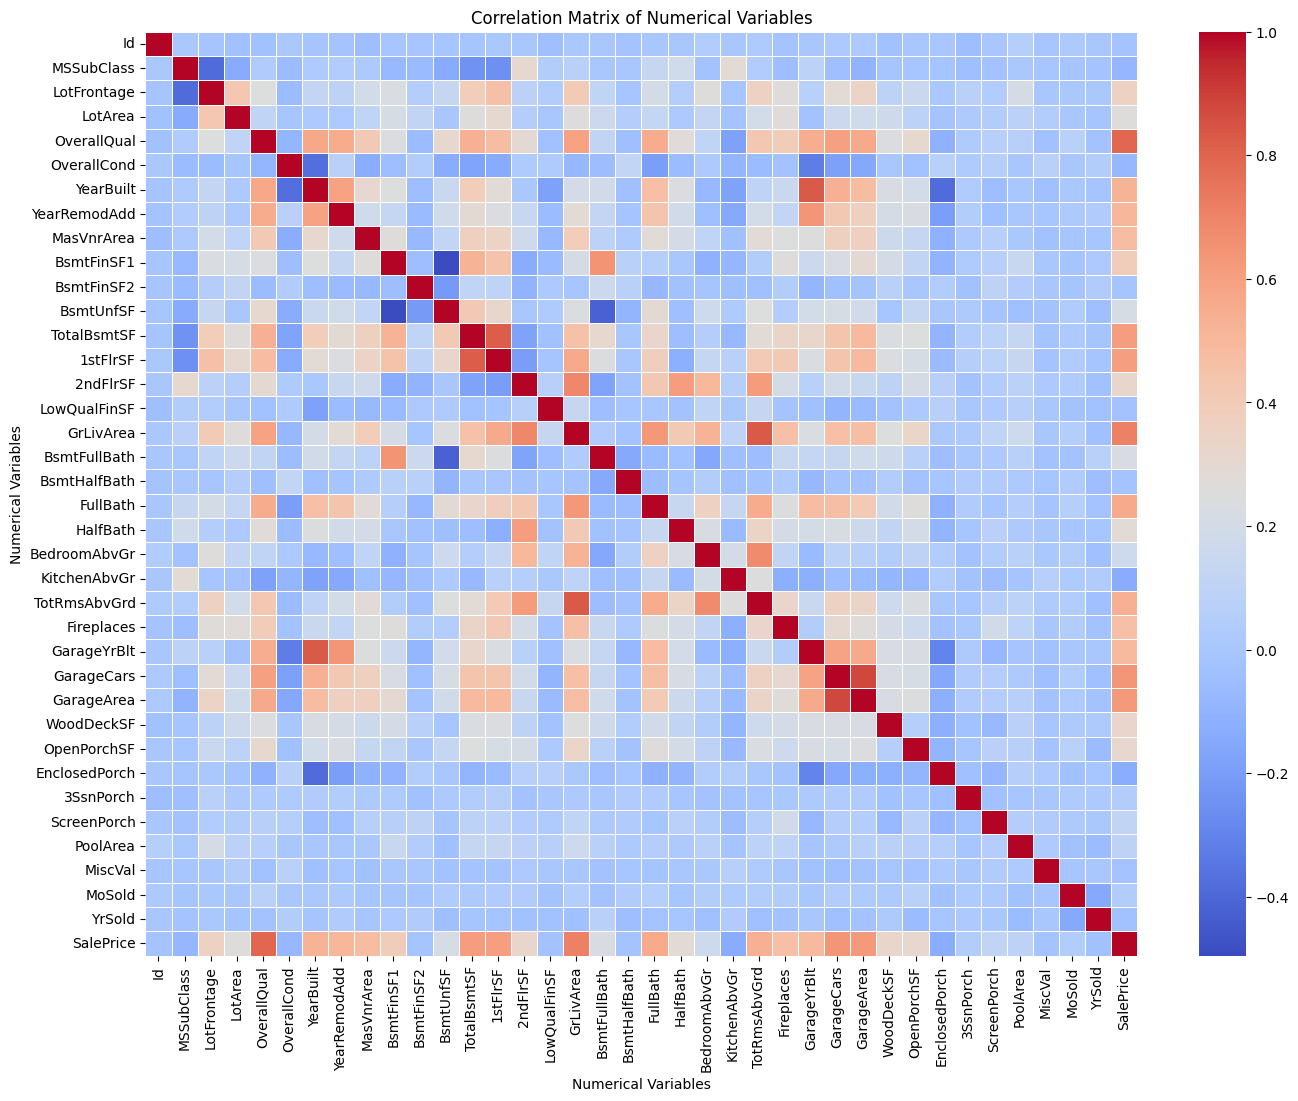

In [33]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix_numerical, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add titles and labels for clarity
plt.title('Correlation Matrix of Numerical Variables')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')
plt.show()

In [34]:
# Calculate the correlation matrix
corr_matrix = numerical_train.corr()
# Get the correlation of all variables with 'SalePrice', sort them, and drop 'SalePrice' itself
saleprice_correlation = corr_matrix['SalePrice'].sort_values(ascending=False).drop('SalePrice')

In [35]:
# Select the top 8 variables
top_8_correlated = saleprice_correlation.head(8)
print(top_8_correlated)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


Among all the variables I choose these top 8 highest correlated variables

In [36]:
#get 8 highest catogrical correlated variables
# Filter categorical variables
categorical_vars = train.select_dtypes(include=['object']).columns

In [37]:
len(categorical_vars)

43

In [38]:
for var in categorical_vars:
    print(train.groupby(var)['SalePrice'].mean().sort_values(ascending=False), '\n')

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64 

Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64 

Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64 

LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64 

LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64 

Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64 

LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: float64 

LandSlope
Sev    204379.230769
Mod    196734.138462
Gtl    179956.799566
Name: SalePrice, dtype: float64 

Neighborhood
NoRidge    335295.317073
Nr

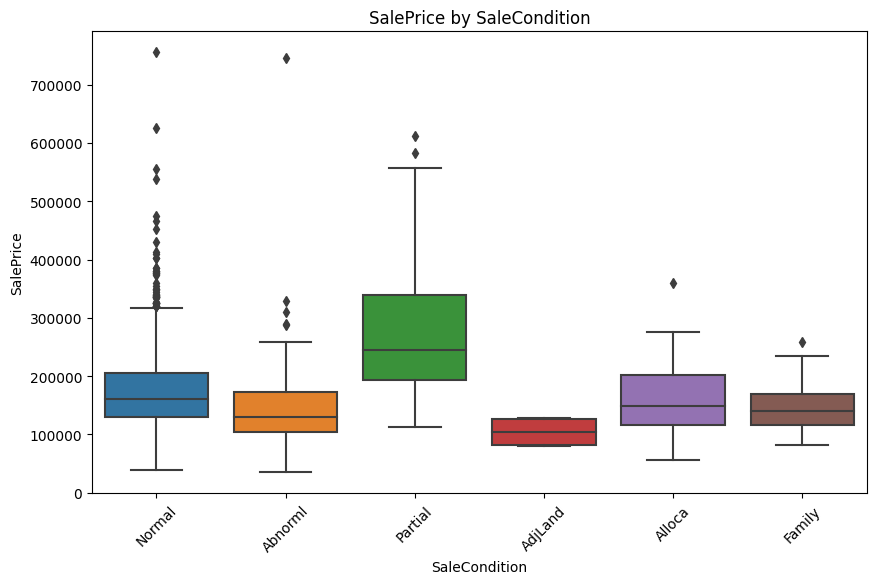

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

#for var in categorical_vars:
plt.figure(figsize=(10, 6))
sns.boxplot(x=var, y='SalePrice', data=train)
plt.title(f'SalePrice by {var}')
plt.xticks(rotation=45)
plt.show()

In [43]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [44]:
# Create column that identifies if the rows are train or test
train['train'] = 1
test['train'] = 0

In [45]:
combined = pd.concat([train, test], ignore_index=True)

In [46]:
combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [47]:
# Impute NAs to average numbers for numerical variables
for column in combined.columns:
    if pd.api.types.is_numeric_dtype(combined[column]):
        combined[column].fillna(combined[column].mean(), inplace=True)

/tmp/ipykernel_33/1468572799.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined[column].fillna(combined[column].mean(), inplace=True)


In [48]:
# Impute NAs to mode numbers for Categorical variables
for column in combined.columns:
    if pd.api.types.is_object_dtype(combined[column]):
        combined[column].fillna(combined[column].mode()[0], inplace=True)

/tmp/ipykernel_33/2462736424.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined[column].fillna(combined[column].mode()[0], inplace=True)


In [49]:
# Check if we have NAs in data
print(combined.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
train            0
Length: 82, dtype: int64


In [50]:
#Check if we have NAs in data
print(combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [67]:
# Identify categorical variables in the dataset
# Assuming that all 'object' type columns in your DataFrame are categorical
categorical_cols = combined.select_dtypes(include=['object']).columns.tolist()


# The resulting dummy variables are automatically in the format of 1s and 0s
combined_encoded = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

In [68]:
# Identify boolean columns in the dataset
boolean_cols = [col for col in combined_encoded.columns if combined_encoded[col].dtype == bool]

# Convert boolean columns to 1/0
for col in boolean_cols:
    combined_encoded[col] = combined_encoded[col].astype(int)

In [69]:
combined_encoded

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


In [70]:
#Split the Combined Dataset
train_data = combined_encoded[combined_encoded['train']== 1].drop(columns=['train'])
test_data = combined_encoded[combined_encoded['train']==0].drop(columns=['train'])

In [71]:
# Check if we split the train and test correctly
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Train Data Shape: (1460, 246)
Test Data Shape: (1459, 246)


In [72]:
# Dropping the 'SalePrice' column from test_data
test_data = test_data.drop(columns=['SalePrice'])
test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1461,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
1462,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
1463,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
1464,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2915,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,0,1,0,0,0,0,0
2916,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,1,0,0,0,0,0
2917,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
# The target column is 'SalesPrice', and we're also dropping the 'Id' column
columns_to_drop = ['SalePrice', 'Id']  # Include 'SalesPrice' and 'Id' in the list of columns to drop
X = train_data.drop(columns=columns_to_drop)  # Use all other columns as features
y = train_data['SalePrice']

In [80]:
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,0,1,0,0,0,1,0


In [81]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [84]:
# Step 2: Split your data into training and testing sets(normally use 70%-80% and 20%-30%) (42 in order to fix the random part)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Create and train your multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions and evaluate your model
y_pred = model.predict(X_test)
print("R-squared: ", r2_score(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

R-squared:  0.7531802203965725
RMSE:  41500.98268869174


In [91]:
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,70.0,8414,6,8,1963,2003,0.000000,663.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1105,60,98.0,12256,8,5,1994,1995,362.000000,1032.0,0.0,...,0,0,0,0,1,0,0,0,1,0
413,30,56.0,8960,5,6,1927,1950,0.000000,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
522,50,50.0,5000,6,7,1947,1950,0.000000,399.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1036,20,89.0,12898,9,5,2007,2008,70.000000,1022.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,20,70.0,8176,5,6,1958,1992,0.000000,846.0,0.0,...,0,0,0,0,1,0,0,0,1,0
323,20,49.0,5820,3,8,1955,2005,0.000000,256.0,0.0,...,0,0,0,0,1,0,0,0,1,0
650,60,65.0,8125,7,6,2007,2007,102.201312,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
439,50,67.0,12354,6,8,1920,2000,0.000000,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0


In [86]:
# Step 2: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
# Step 3: Create and train your Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [94]:
# Step 4: Make predictions and evaluate your model
y_pred = model.predict(X_test)
print("R-squared: ", r2_score(y_test, y_pred))
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

R-squared:  0.8935274681841717
RMSE:  27257.57344253966


In [96]:
# Load and prepare train_data
X_train = train_data.drop(columns=['SalePrice', 'Id'])  # Assuming 'SalesPrice' is the target, 'Id' is a non-feature
y_train = train_data['SalePrice']

In [99]:
# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [101]:
# Load and prepare test_data
# Make sure test_data.csv is formatted like train_data, minus the 'SalesPrice' column
X_test = test_data.drop(columns=['Id'])  # Assuming 'Id' is a non-feature column


In [103]:
# Use the trained model to predict/forecast on test_data
predictions = model.predict(X_test)

# The 'predictions' array now holds the predicted values for 'SalesPrice' for each row in your test_data
# You can now save these predictions to a CSV, display them, or use them in further analysis
predicted_sales_price = pd.DataFrame(predictions, columns=['PredictedSalesPrice'])
predicted_sales_price.to_csv('predicted_sales_price.csv', index=False)

In [104]:
predicted_sales_price

,PredictedSalesPrice
0,131293.00
1,156131.40
2,184363.24
3,182131.80
4,196120.86
...,...
1454,87019.00
1455,85903.50
1456,159442.87
1457,114064.50


In [107]:
# Use the trained model to predict/forecast on test_data
SalePrice = model.predict(X_test)  # Changed 'PredictedSalesPrice' to 'SalePrice'

# Extract the 'Id' column from test_data
ids = test_data['Id']

# Combine the 'Id' column with the SalePrice into a new DataFrame
results = pd.DataFrame({
    'Id': ids,
    'SalePrice': SalePrice  # Changed 'PredictedSalesPrice' to 'SalePrice'
})

# You can now save this DataFrame to a CSV file, display it, or use it for further analysis
print(results.head())  # Display the first few rows of the results table

# Optional: Save the results to a CSV file
results.to_csv('sale_prices.csv', index=False)

        Id  SalePrice
1460  1461  131293.00
1461  1462  156131.40
1462  1463  184363.24
1463  1464  182131.80
1464  1465  196120.86
